In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import os
import csv
from matplotlib.gridspec import GridSpec


In [4]:
def get_final(dir_to_get):
    out = []
    run_len = len(os.listdir(dir_to_get))
    with open(dir_to_get+f"{run_len-1}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        return out

def get_ics(dir_to_get):
    out = []
    run_len = len(os.listdir(dir_to_get))
    with open(dir_to_get+f"{0}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        return out

def get_all(dir_to_get):
    out = []
    runs = np.sort([int(a[0:-4]) for a in os.listdir(dir_to_get)])
    for run in runs:
        run_out = []
        with open(dir_to_get+f"{run}.csv") as f:
            reader = csv.reader(f)

            for v in reader:
                run_out.append([float(a) for a in v])
        out.append(run_out)
    return out

In [5]:
def get_ages(data):
    indv = np.array([data[0],np.zeros_like(data[0])])
    for t in range(1,len(data)):
        for n in data[t]:
            try:
                i = indv[0].tolist().index(n)
                indv[1][i] += 1
            except:
                indv = np.array([np.append(indv[0], n),np.append(indv[1],0)])
    return indv

def get_ages_from_dir(dir):
    full_data =get_all(dir)
    shrimp_locations = [s[0] for s in full_data]
    fish_locations = [f[1] for f in full_data]
    a=get_ages(shrimp_locations)
    return a[1]

def get_ages_from_index(ti, di):
    base_dir = "/media/jonatank/PG/HML/taxis_sens_0/"
    taxis_list = np.sort(os.listdir(base_dir))
    diff_list = np.sort(os.listdir(base_dir+taxis_list[0]+"/"))
    d = base_dir+taxis_list[ti] + "/" + diff_list[di] + "/"
    taxis = float(taxis_list[ti][6:])
    diff = float(diff_list[di][5:])
    return get_ages_from_dir(d), taxis, diff

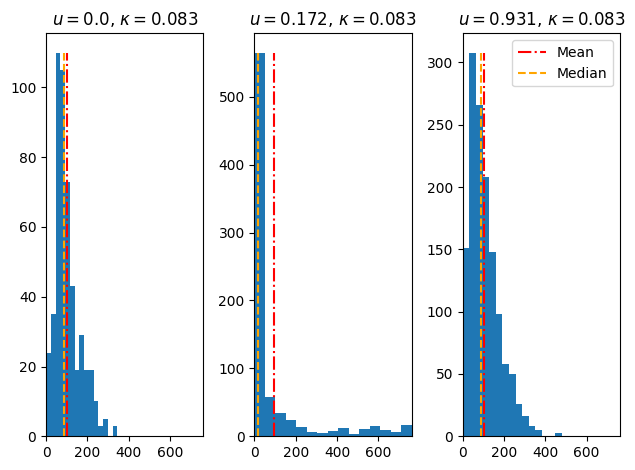

In [8]:
diff_index = 8
taxis_list = [0,5,27]
fig, ax = plt.subplots(1,3)
max_x_val = 0
for i, a, ti in zip(np.arange(len(taxis_list)),ax,taxis_list):
    d,t,df = get_ages_from_index(ti,diff_index)
    max_x_val = max(max_x_val, np.max(d))
    v = a.hist(d,15)[0]
    a.plot([np.mean(d) for i in range(2)],[0,np.max(v)],label="Mean",linestyle="-.",color="r")
    a.plot([np.median(d) for i in range(2)],[0,np.max(v)],label="Median",linestyle="--",color="orange")
    if i==len(taxis_list)-1: {a.legend()} 
    a.set_title(f"$u = {round(t,3)}$, $\kappa={round(df,3)}$")
for a in ax:
    a.set_xlim(0,max_x_val)
    a.xaxis.set_major_locator(ticker.MultipleLocator(200,0))
fig.tight_layout()

In [48]:
t=29
taxis_dirs = np.sort(os.listdir("taxis_quick/t_ic_1/"))
s,f = get_final(f"./taxis_quick/t_ic_1/{taxis_dirs[t]}/")

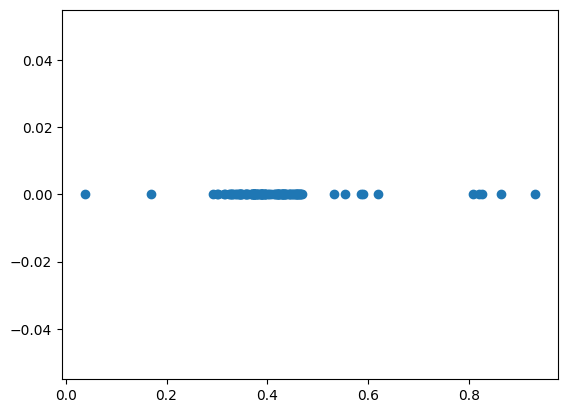

In [49]:
plt.scatter(s,np.zeros_like(s))